In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file = 'data/telco_customer_churn.csv' 
df = pd.read_csv(csv_file)

In [3]:
df.head()

,customer ID,gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,MultipleLines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns = [c.lower().replace(' ', '_').replace('-', '_') for c in df.columns]
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiplelines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiplelines      7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [6]:
# Replace 'No internet service' with 'No' in all columns
cols_to_fix = ['online_security', 'multiplelines', 'online_backup', 
               'device_protection', 'tech_support', 'streaming_tv','streaming_movies']

for col in cols_to_fix:
    df[col] = df[col].replace(['No internet service','No phone service'], 'No')

df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiplelines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['total_charges'].isnull().sum()

np.int64(11)

In [8]:
df['total_charges'] = df['total_charges'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiplelines      7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [9]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiplelines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Create a list to store column names
yes_no_cols = []

for col in df.columns:
    unique_vals = set(df[col].unique())
    
    # Check if both 'Yes' and 'No' exist in the column
    if 'Yes' in unique_vals and 'No' in unique_vals:
        yes_no_cols.append(col)

print("Columns containing 'Yes' and 'No':")
print(yes_no_cols)

Columns containing 'Yes' and 'No':
['partner', 'dependents', 'phone_service', 'multiplelines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn']


In [11]:
from sklearn.preprocessing import LabelEncoder

# 1. Convert Binary Columns (Yes/No) to 0/1
# We loop through columns that only have 2 options
binary_cols = yes_no_cols

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# 2. Convert Gender to 0/1 manually (to be safe)
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

# 3. Convert "One-Hot" Variables (Categories with >2 options)
# InternetService (DSL, Fiber, No) -> becomes 3 columns
# Contract (Month-to-month, One year, Two year) -> becomes 3 columns
df = pd.get_dummies(df, columns=['internet_service', 'contract', 'payment_method'])

# Check the new shape (should have more columns now)
print(f"New Data Shape: {df.shape}")
print(df.head())

New Data Shape: (7043, 28)
  customer_id  gender  senior_citizen  partner  dependents  tenure  \
0  7590-VHVEG       1               0        1           0       1   
1  5575-GNVDE       0               0        0           0      34   
2  3668-QPYBK       0               0        0           0       2   
3  7795-CFOCW       0               0        0           0      45   
4  9237-HQITU       1               0        0           0       2   

   phone_service  multiplelines  online_security  online_backup  ...  \
0              0              0                0              1  ...   
1              1              0                1              0  ...   
2              1              0                1              1  ...   
3              0              0                1              0  ...   
4              1              0                0              0  ...   

   internet_service_DSL  internet_service_Fiber optic  internet_service_No  \
0                  True                  

In [12]:
from sklearn.model_selection import train_test_split

# 1. Separate Features (X) and Target (y)
X = df.drop(['churn', 'customer_id'], axis=1)
y = df['churn']

# 2. Split into Train (80%) and Test (20%) sets
# random_state=42 ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Testing shapes:  X={X_test.shape},  y={y_test.shape}")

Training shapes: X=(5634, 26), y=(5634,)
Testing shapes:  X=(1409, 26),  y=(1409,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the Model
model = RandomForestClassifier(n_estimators=100, 
                               class_weight='balanced',  
                               random_state=42)
# 2. Train the Model (The "Learning" Phase)
model.fit(X_train, y_train)

# 3. Make Predictions on the Test Set
y_pred = model.predict(X_test)

Model Accuracy: 79.84%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



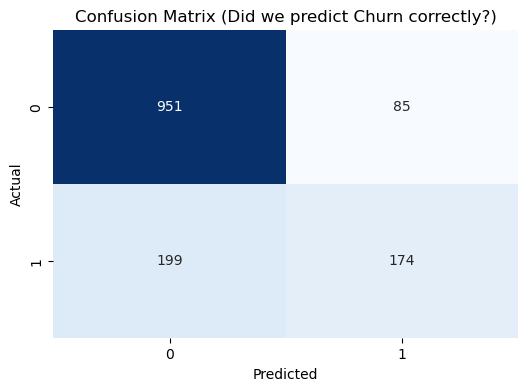

In [14]:
# 1. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# 2. Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Did we predict Churn correctly?)')
plt.show()

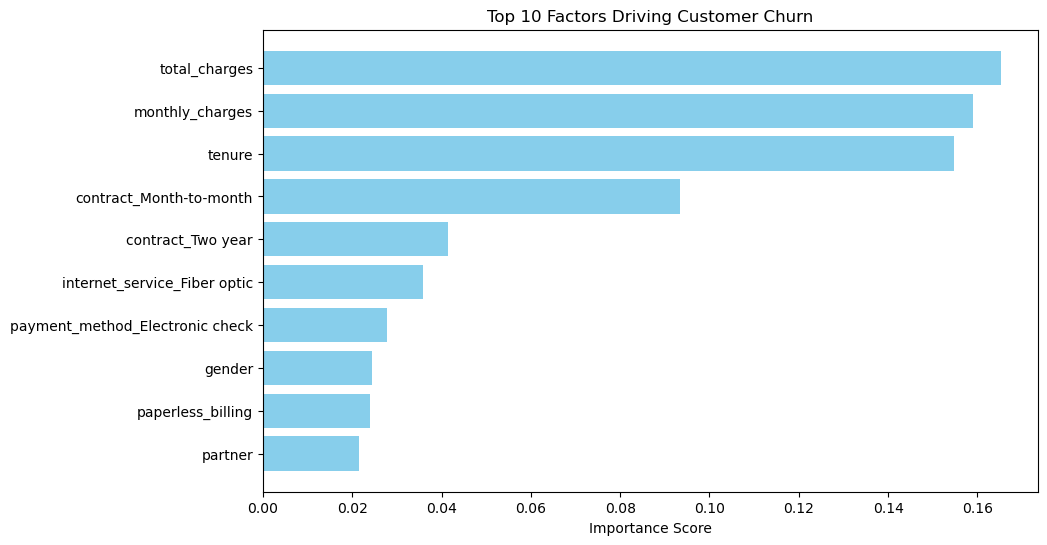

In [15]:
# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color='skyblue')
plt.gca().invert_yaxis() # Highest importance at the top
plt.title("Top 10 Factors Driving Customer Churn")
plt.xlabel("Importance Score")
plt.show()

In [16]:
import pickle

# 1. Save the Model (You likely did this already)
with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# 2. CRITICAL: Save the Column Names! 
# The app needs to know exactly which columns (and order) the model expects.
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(X_train.columns, f)

print("✅ Model and Column Names saved successfully!")

✅ Model and Column Names saved successfully!


In [17]:
# # 1. Predict Probabilities for EVERYONE in the dataset
# df['churn_probability'] = best_model.predict_proba(X)[:, 1]

# # 2. Save this new "Scored" dataset
# df.to_csv('customer_churn_predictions.csv', index=False)
# print("Saved predictions to 'customer_churn_predictions.csv'")